<a href="https://colab.research.google.com/github/mqifjjfwiot/SeSAC_Data2/blob/master/decision_tree_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리

## 로지스틱 회귀로 와인 분류하기

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()
#row 6497개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [8]:
data

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [9]:
target

array([0., 0., 0., ..., 1., 1., 1.])

In [10]:
from sklearn.model_selection import train_test_split

In [29]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.21, random_state=42)
#데이터가 너무 작으면 test_size를 줄여서 많이 시키는게 낫다. 줄여보자. 0.2 > 0.15

In [30]:
print(train_input.shape, test_input.shape)
#85%의 훈련데이터, 15%의 테스트데이터

(5132, 3) (1365, 3)


In [31]:
train_input
#훈련데이터

array([[12.5 ,  2.4 ,  3.31],
       [10.6 , 12.6 ,  3.2 ],
       [ 9.9 ,  1.8 ,  3.47],
       ...,
       [ 9.5 ,  5.6 ,  3.24],
       [ 9.5 ,  8.  ,  3.18],
       [ 9.5 ,  2.7 ,  3.51]])

In [32]:
test_input
#테스트데이터

array([[12.2 , 12.8 ,  3.26],
       [ 9.9 ,  2.2 ,  3.27],
       [12.  ,  7.4 ,  3.18],
       ...,
       [ 8.6 , 16.  ,  3.13],
       [ 9.1 , 12.9 ,  3.06],
       [ 8.5 , 13.3 ,  3.14]])

In [33]:
from sklearn.preprocessing import StandardScaler
#스케일러. 표준분포 분석용. train데이터로 표준화

In [34]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [35]:
from sklearn.linear_model import LogisticRegression
#회귀분석용

In [36]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))#훈련 정확도
print(lr.score(test_scaled, test_target))#테스트 정확도

0.7815666406858924
0.7750915750915751


In [69]:
#연습용
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=10)
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))#훈련 정확도
print(lr.score(test_scaled, test_target))#테스트 정확도

0.7850179579271421
0.7766051011433597


### 설명하기 쉬운 모델과 어려운 모델

In [37]:
#기존의 모델은 설명하기 어려운 모델.
#설명하기 쉬운 모델 => 의사 결정 트리

In [38]:
print(lr.coef_, lr.intercept_)

[[ 0.51801544  1.67537536 -0.69433355]] [1.82103277]


In [42]:
#'알콜', '당분', '산도'
#'결과'별 확률
lr.predict_proba([[31,3,7]])

array([[1.45554162e-08, 9.99999985e-01]])

In [43]:
#'결과' 출력
lr.predict([[31,3,7]])

array([1.])

In [71]:
test = [[3,3,3],[10,30,2],[10,15,4]]
lr.predict(test)
lr.predict_proba(test)

array([[1.71011601e-03, 9.98289884e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.59650071e-13, 1.00000000e+00]])

## 결정 트리

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9994869163673679
0.8421284080914688


In [76]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(500,70))
plot_tree(dt)
plt.show()

In [ ]:
#깊이 조절

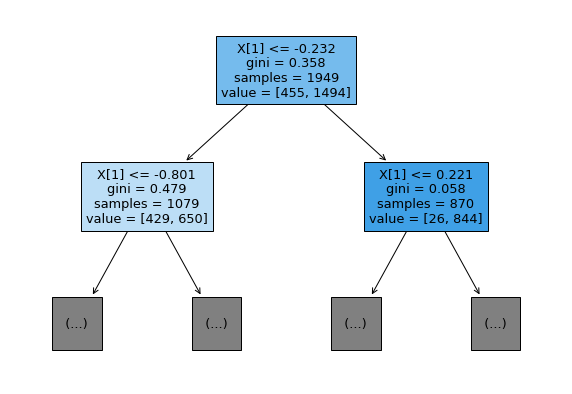

In [77]:
#종합적으로 '함수값'의 크기에 따라 분화되는것?
plt.figure(figsize=(10,7))
#plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plot_tree(dt, max_depth=1, filled=True)
plt.show()

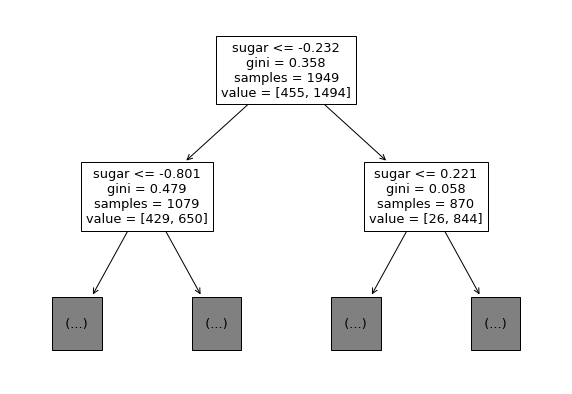

In [85]:
#요소별로 기준 출력
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1,  feature_names=['alcohol', 'sugar', 'pH'])
#plot_tree(dt, max_depth=1, filled=True)
plt.show()

### 가지치기

In [83]:
#depth를 늘리면? 과측정되기 쉽다. 클수록 좋은거 아냐
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.887634684453566
0.8535620052770448


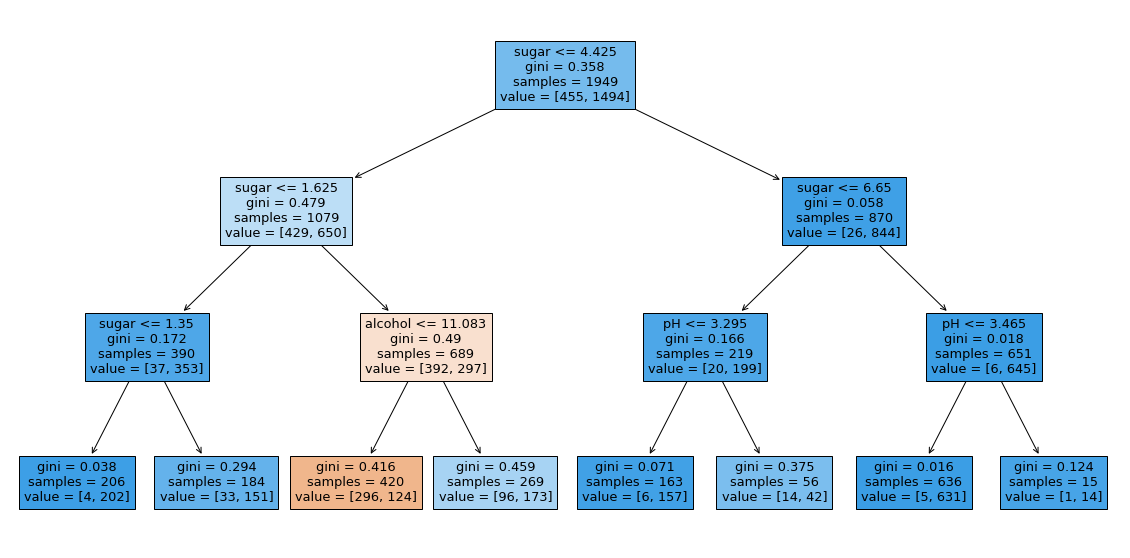

In [88]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [86]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8547973319651103
0.8390501319261213


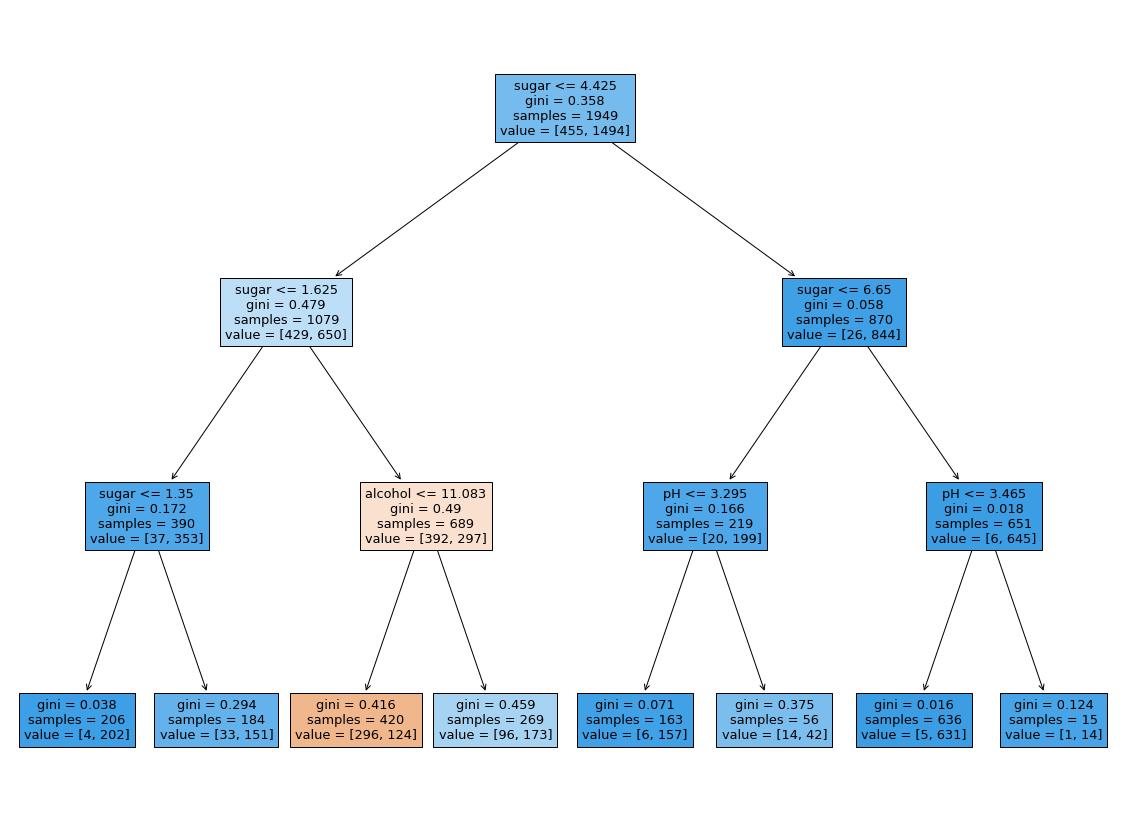

In [87]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [89]:
print(dt.feature_importances_)

[0.13548753 0.85123311 0.01327937]


## 확인문제

In [ ]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


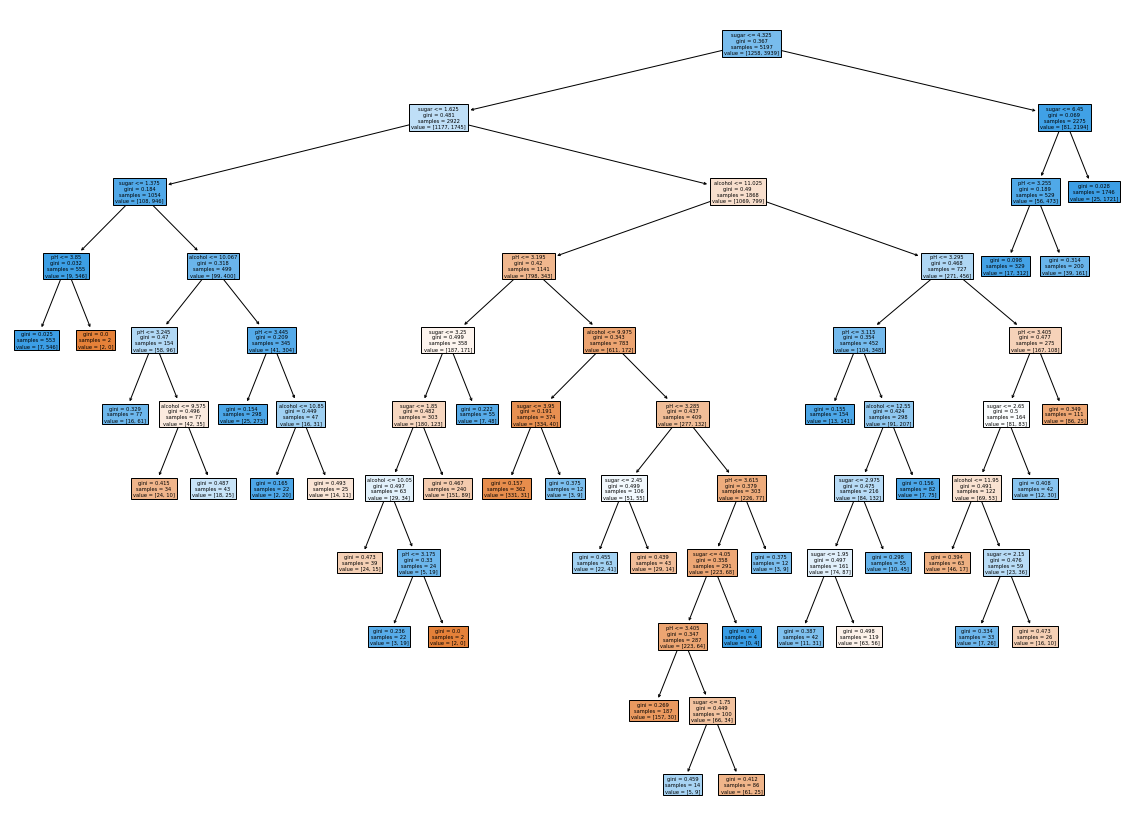

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()